## <center>Predict whether the Employee of an Organization should get Promotion or Not?</center>

&nbsp;

Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:
    * They first identify a set of employees based on recommendations/ past performance.
    * Selected employees go through the separate training and evaluation program for each vertical. These programs are based on he required skill of each vertical
    * At the end of the program, based on various factors such as training performance, an employee gets the promotion

![image](https://corehr.files.wordpress.com/2013/02/wrong-promotion1.jpg?w=290)

In [1]:
# lets import all the required libraries

# for mathematical operations
import numpy as np
# for dataframe operations
import pandas as pd

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# for machine learning
import sklearn

# setting up the size of the figures
plt.rcParams['figure.figsize'] = (16, 5)

# setting up the style of the plot
plt.style.use('fivethirtyeight')

## Reading the Dataset

* Here, we are having two datasets, i.e., Training and Testing Datasets
* We will read both the datasets 
* Training Datasets is used to train the Machine learning Models
* After learning the patterns from the Testing Datasets, We have to predict the Target Variable.

In [2]:
df = pd.read_csv('employee_promotion.csv')

In [3]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
df.shape

(54808, 14)

In [5]:
df.drop(['employee_id','region'],axis = 1,inplace = True)

In [6]:
df.rename(columns = {'awards_won?':'awards_won'},inplace = True)

In [7]:
df.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   education             52399 non-null  object 
 2   gender                54808 non-null  object 
 3   recruitment_channel   54808 non-null  object 
 4   no_of_trainings       54808 non-null  int64  
 5   age                   54808 non-null  int64  
 6   previous_year_rating  50684 non-null  float64
 7   length_of_service     54808 non-null  int64  
 8   KPIs_met >80%         54808 non-null  int64  
 9   awards_won            54808 non-null  int64  
 10  avg_training_score    54808 non-null  int64  
 11  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 5.0+ MB


In [9]:
round(df.isnull().sum()/len(df)*100,1)

department              0.0
education               4.4
gender                  0.0
recruitment_channel     0.0
no_of_trainings         0.0
age                     0.0
previous_year_rating    7.5
length_of_service       0.0
KPIs_met >80%           0.0
awards_won              0.0
avg_training_score      0.0
is_promoted             0.0
dtype: float64

In [10]:
df['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [11]:
df['education'] = df['education'].fillna(df['education'].mode()[0])

In [12]:
df['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [13]:
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].mode()[0])

In [14]:
df['previous_year_rating'] = df['previous_year_rating'].astype(int)

In [15]:
df.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5,8,1,0,49,0
1,Operations,Bachelor's,m,other,1,30,5,4,0,0,60,0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3,7,0,0,50,0
3,Sales & Marketing,Bachelor's,m,other,2,39,1,10,0,0,50,0
4,Technology,Bachelor's,m,other,1,45,3,2,0,0,73,0


In [16]:
df['gender'].replace({'f':'Female','m':'Male'},inplace = True)

# Exploratory Data Analysis

## Univariate Analysis

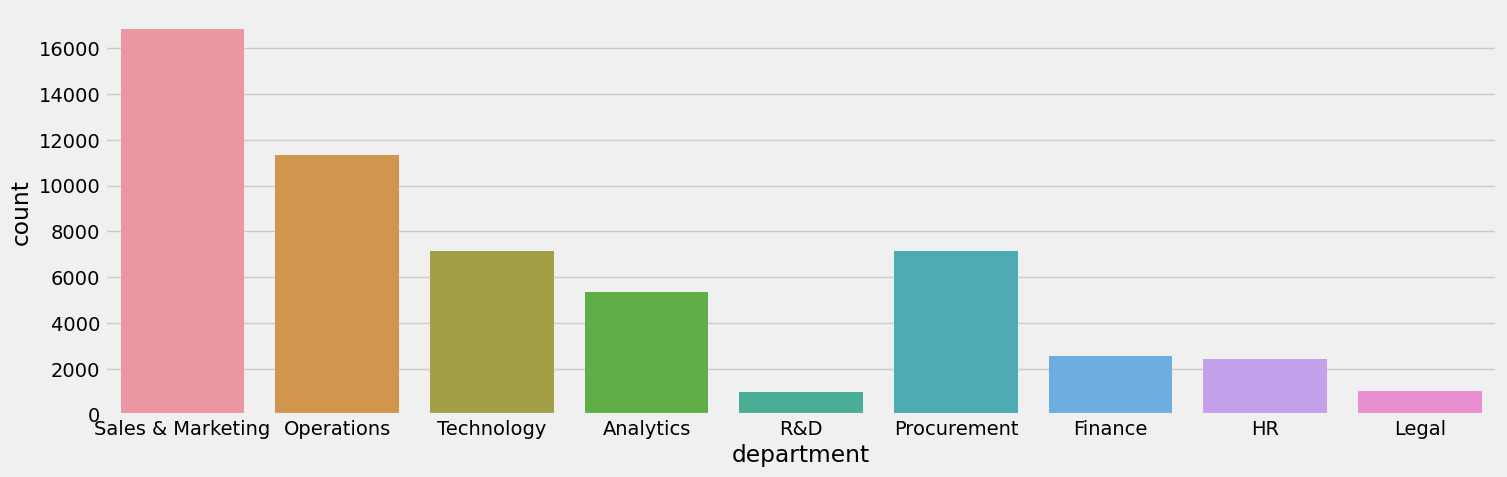

In [17]:
# Visualising the Department column :

sns.countplot(x = df['department'])
plt.show()

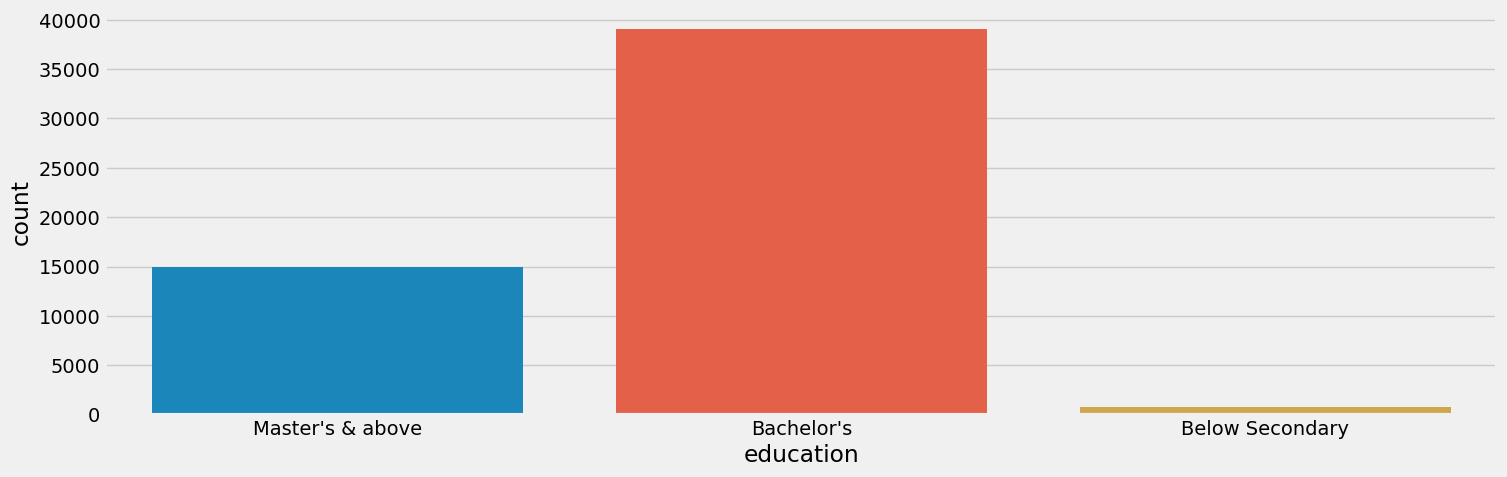

In [18]:
# Visualising the Education column :

sns.countplot(x = df['education'])
plt.show()

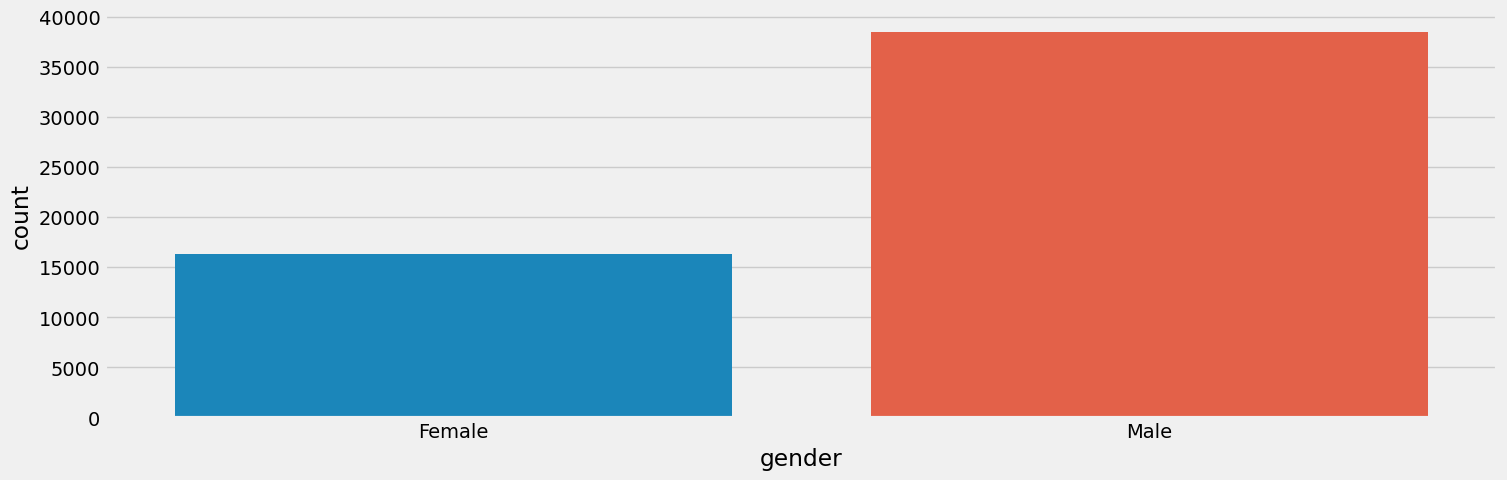

In [19]:
# Visualising the Gender column :

sns.countplot(x = df['gender'])
plt.show()

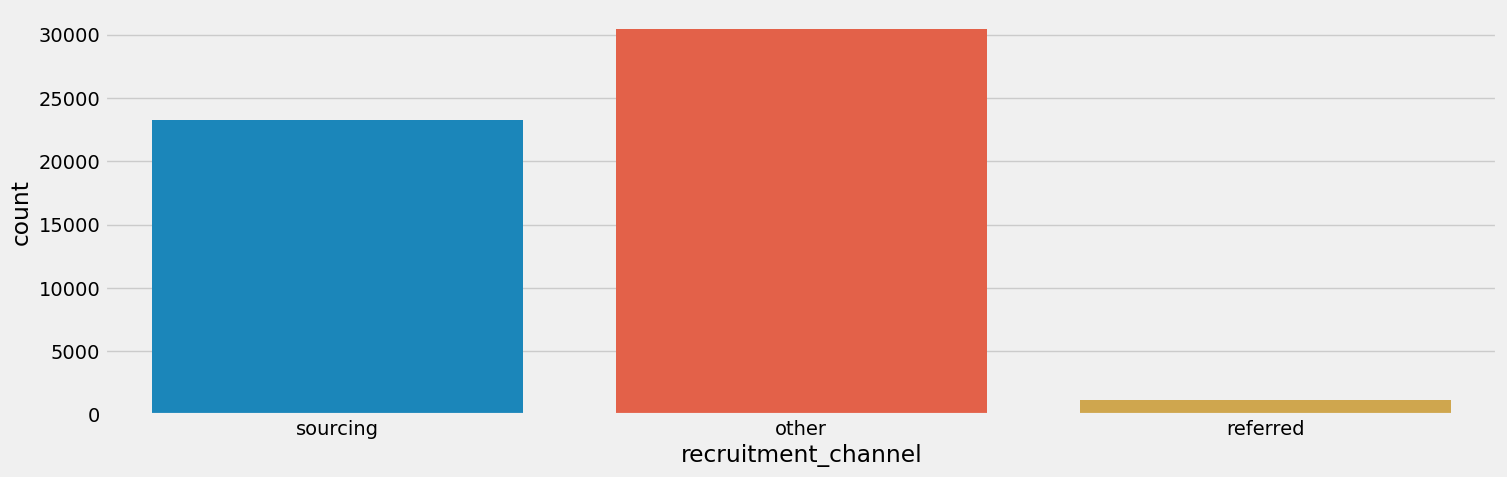

In [20]:
# Visualising the recruitment_channel column :

sns.countplot(x = df['recruitment_channel'])
plt.show()

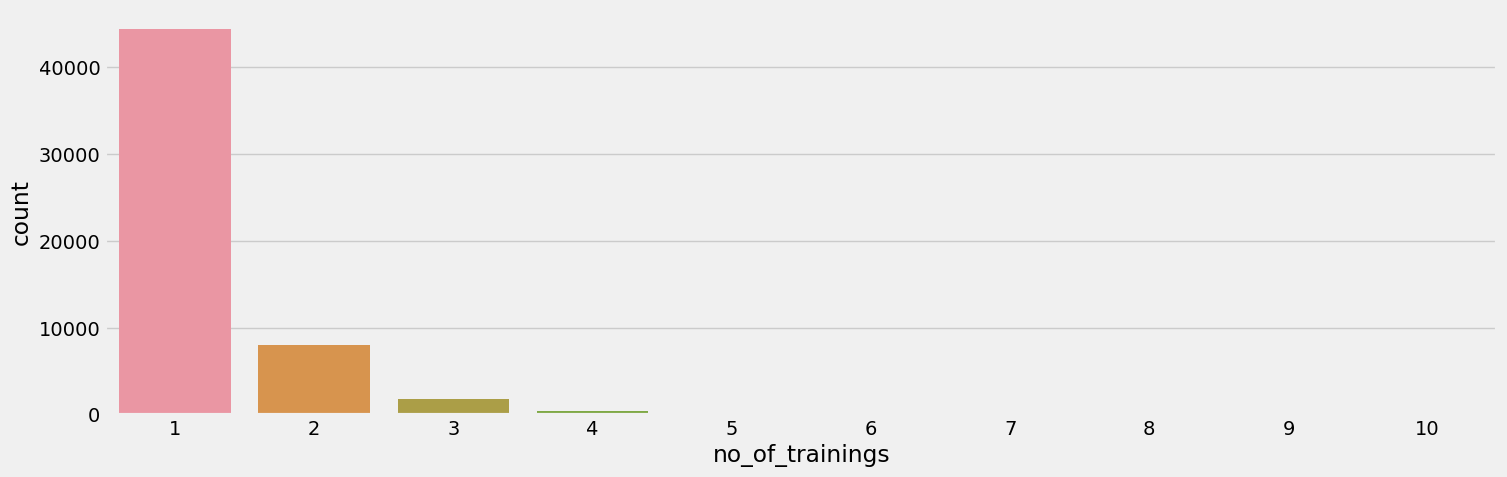

In [21]:
# Visualising the recruitment_channel column :

sns.countplot(x = df['no_of_trainings'])
plt.show()

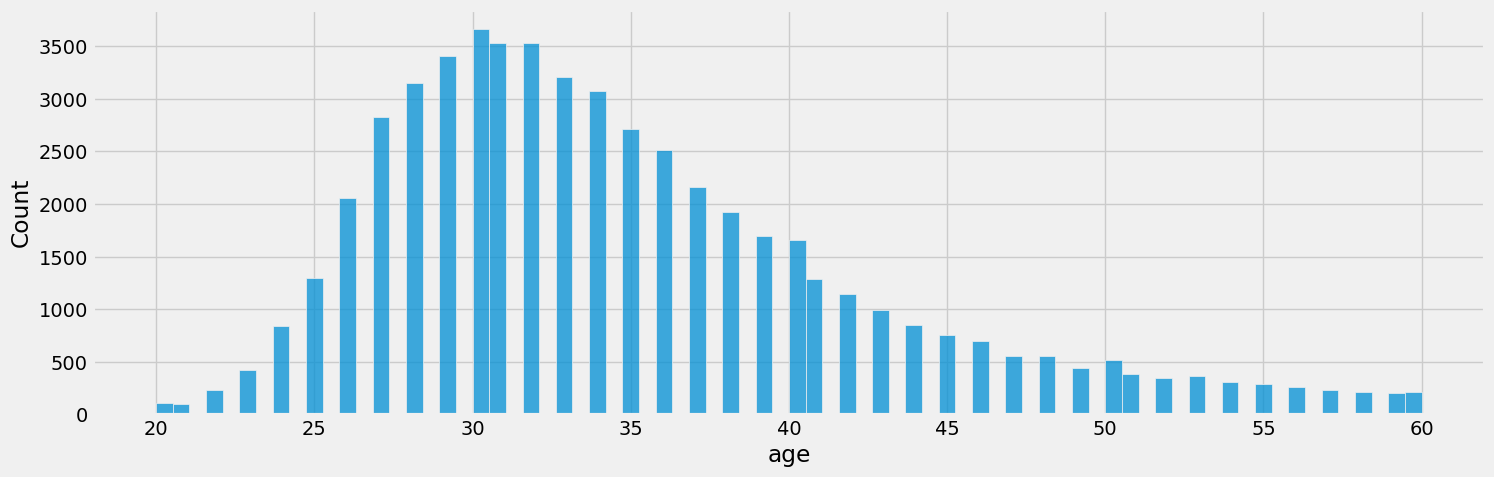

In [22]:
# Visualising the age column :

sns.histplot(df['age'])
plt.show()

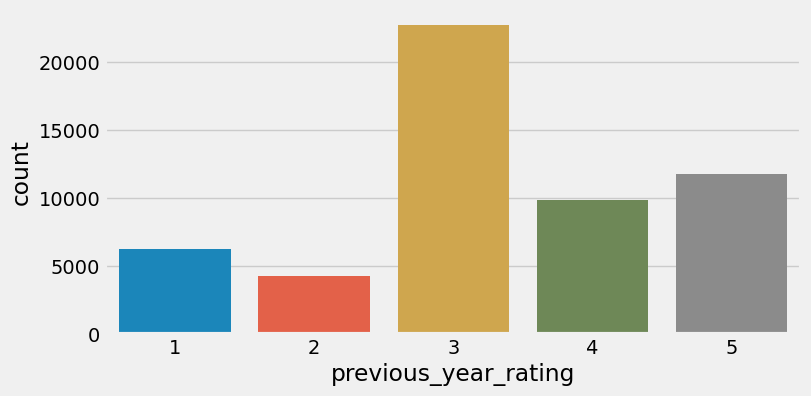

In [23]:
# Visualising the previous_year_rating column :

plt.rcParams['figure.figsize'] = (8,4)
sns.countplot(x = df['previous_year_rating'])
plt.show()

In [24]:
a = df['length_of_service'].value_counts()[:5]

In [25]:
a.values

array([7033, 6836, 6684, 5832, 5551], dtype=int64)

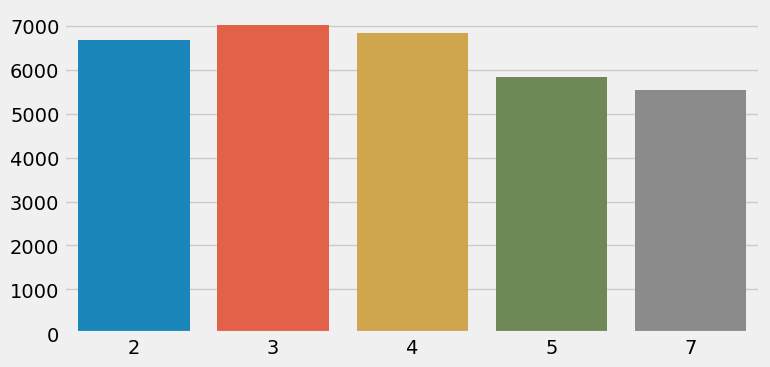

In [26]:
# Visualising the length_of_service column :

sns.barplot(x = a.index,y = a.values)
plt.show()

In [27]:
df['KPIs_met >80%'].value_counts()

0    35517
1    19291
Name: KPIs_met >80%, dtype: int64

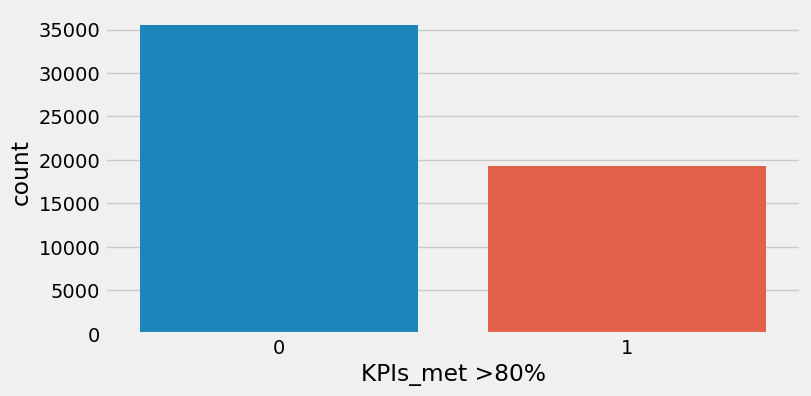

In [28]:
# Visualising the KPIs_met >80% column :

sns.countplot(x = df['KPIs_met >80%'])
plt.show()

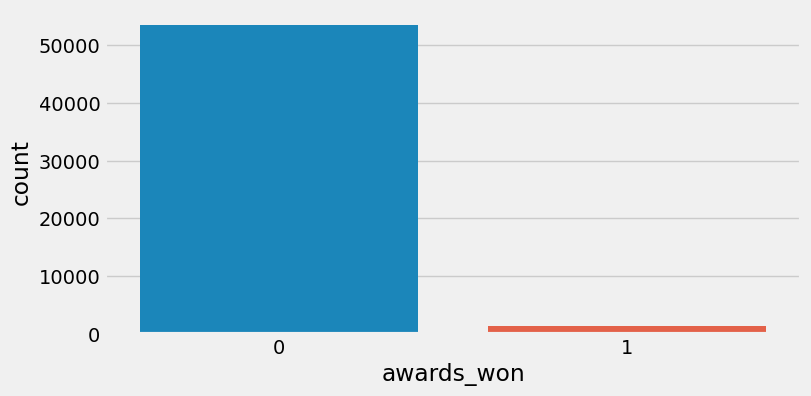

In [29]:
# Visualising the awards_won column :

sns.countplot(x = df['awards_won'])
plt.show()

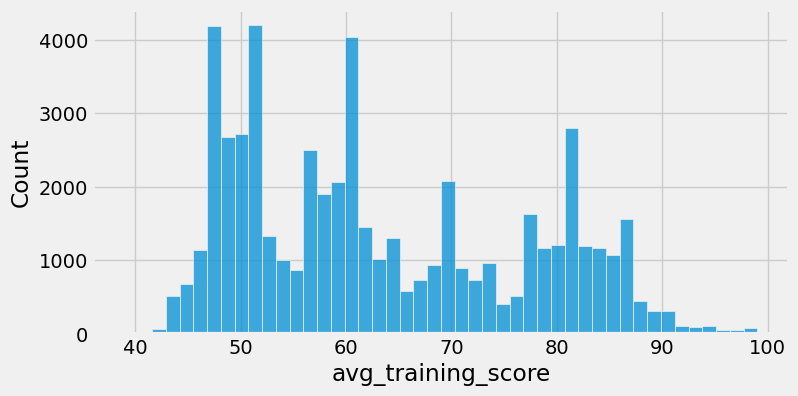

In [30]:
# Visualising the avg_training_score column :

sns.histplot(df['avg_training_score'])
plt.show()

## Bivariate Analysis

In [31]:
df.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,Female,sourcing,1,35,5,8,1,0,49,0
1,Operations,Bachelor's,Male,other,1,30,5,4,0,0,60,0
2,Sales & Marketing,Bachelor's,Male,sourcing,1,34,3,7,0,0,50,0
3,Sales & Marketing,Bachelor's,Male,other,2,39,1,10,0,0,50,0
4,Technology,Bachelor's,Male,other,1,45,3,2,0,0,73,0


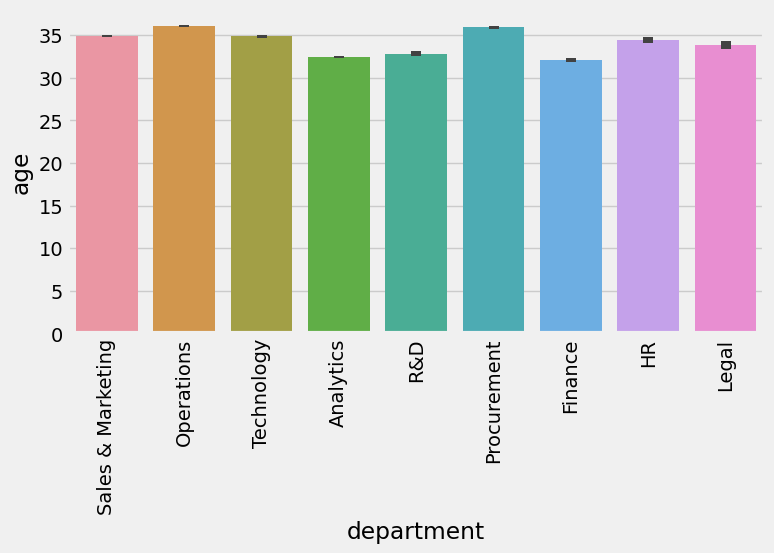

In [32]:
sns.barplot(x = 'department', y = 'age', data = df)
plt.xticks(rotation = 90)
plt.show()

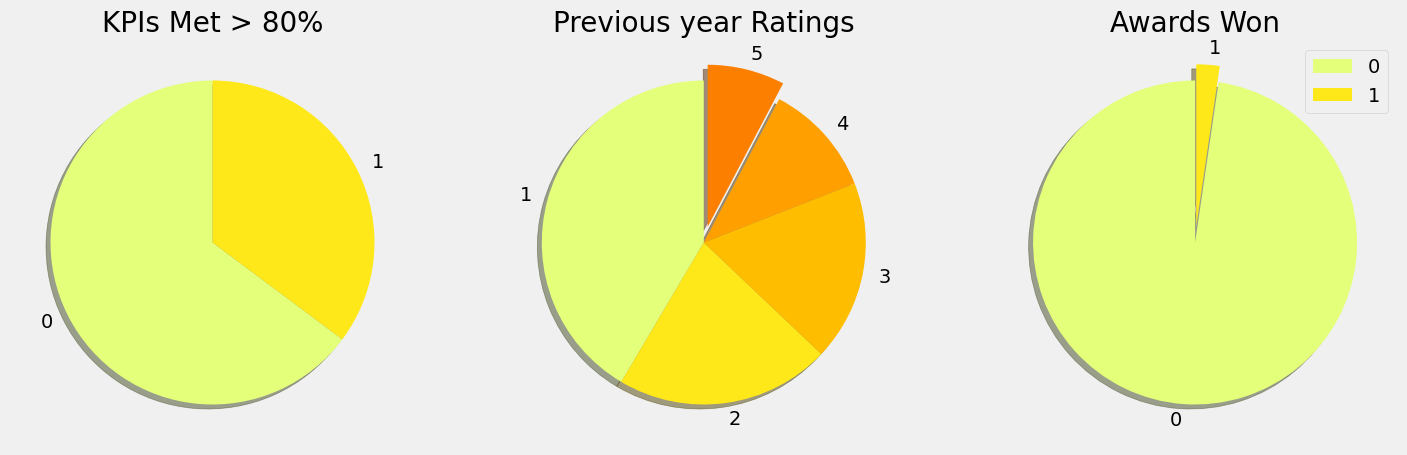

In [33]:
# lets plot pie chart for the columns where we have very few categories
plt.rcParams['figure.figsize'] = (16,5)
plt.style.use('fivethirtyeight')

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 1)
labels = ['0','1']
sizes = df['KPIs_met >80%'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('KPIs Met > 80%', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 2)
labels = ['1', '2', '3', '4', '5']
sizes = df['previous_year_rating'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0, 0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Previous year Ratings', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 3)
labels = ['0', '1']
sizes = df['awards_won'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0,0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Awards Won', fontsize = 20)


plt.legend()
plt.show()

In [34]:
df.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,Female,sourcing,1,35,5,8,1,0,49,0
1,Operations,Bachelor's,Male,other,1,30,5,4,0,0,60,0
2,Sales & Marketing,Bachelor's,Male,sourcing,1,34,3,7,0,0,50,0
3,Sales & Marketing,Bachelor's,Male,other,2,39,1,10,0,0,50,0
4,Technology,Bachelor's,Male,other,1,45,3,2,0,0,73,0


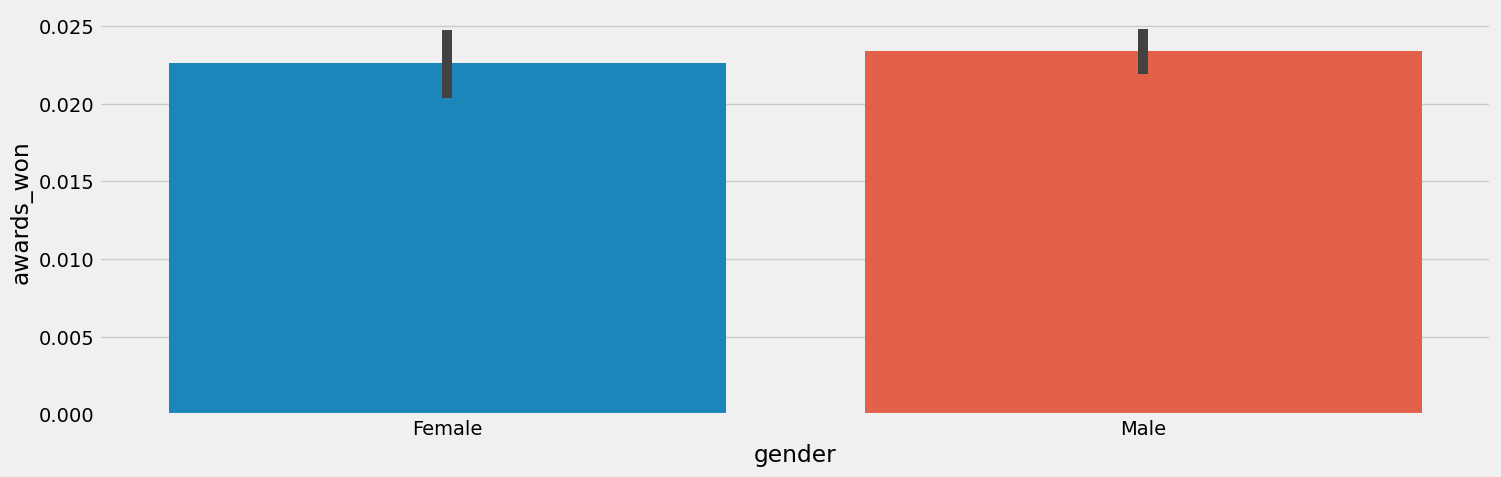

In [35]:
# Awards won Gender wise :

sns.barplot(y = 'awards_won', x = 'gender', data = df)
plt.show()

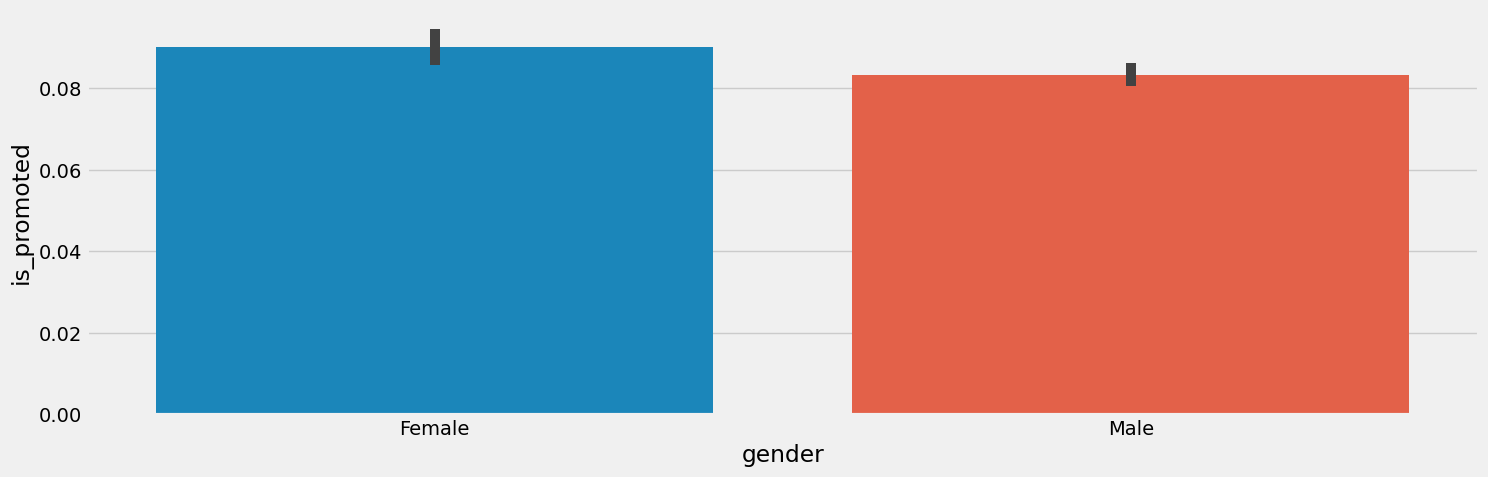

In [36]:
# Lets compare the Gender Gap in the promotion

sns.barplot(x = 'gender', y = 'is_promoted', data = df)
plt.show()

<Axes: xlabel='gender'>

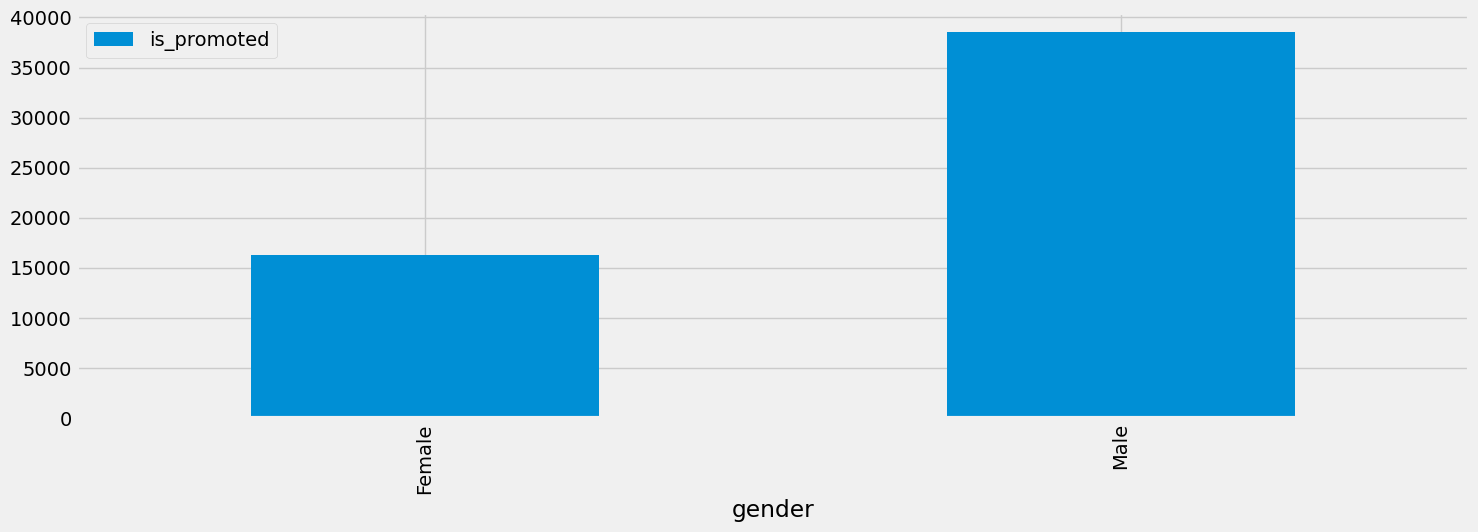

In [37]:
# Lets compare the Gender Gap in the promotion

df[['is_promoted','gender']].groupby(['gender']).count().plot(kind = 'bar')

In [38]:
df['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

<Axes: xlabel='department'>

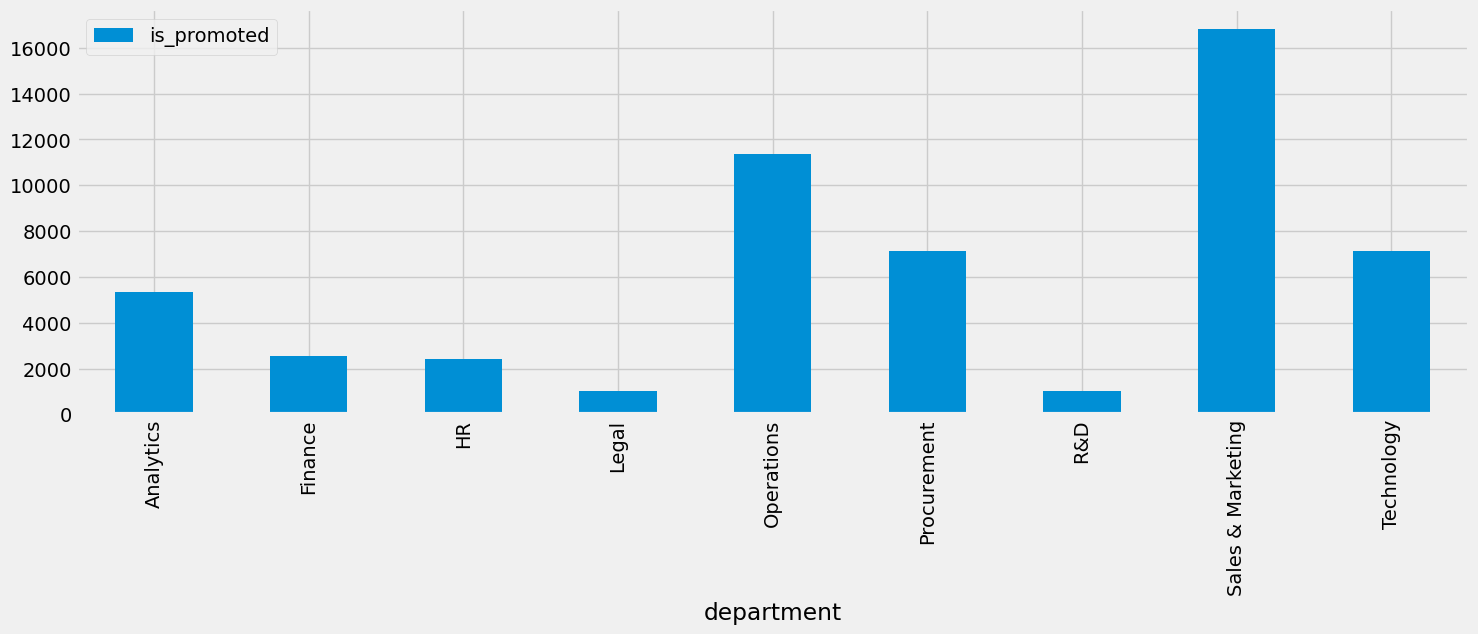

In [39]:
# lets compare the effect of different Departments and Promotion

df[['department','is_promoted']].groupby('department').count().plot(kind = 'bar')

<Axes: xlabel='department'>

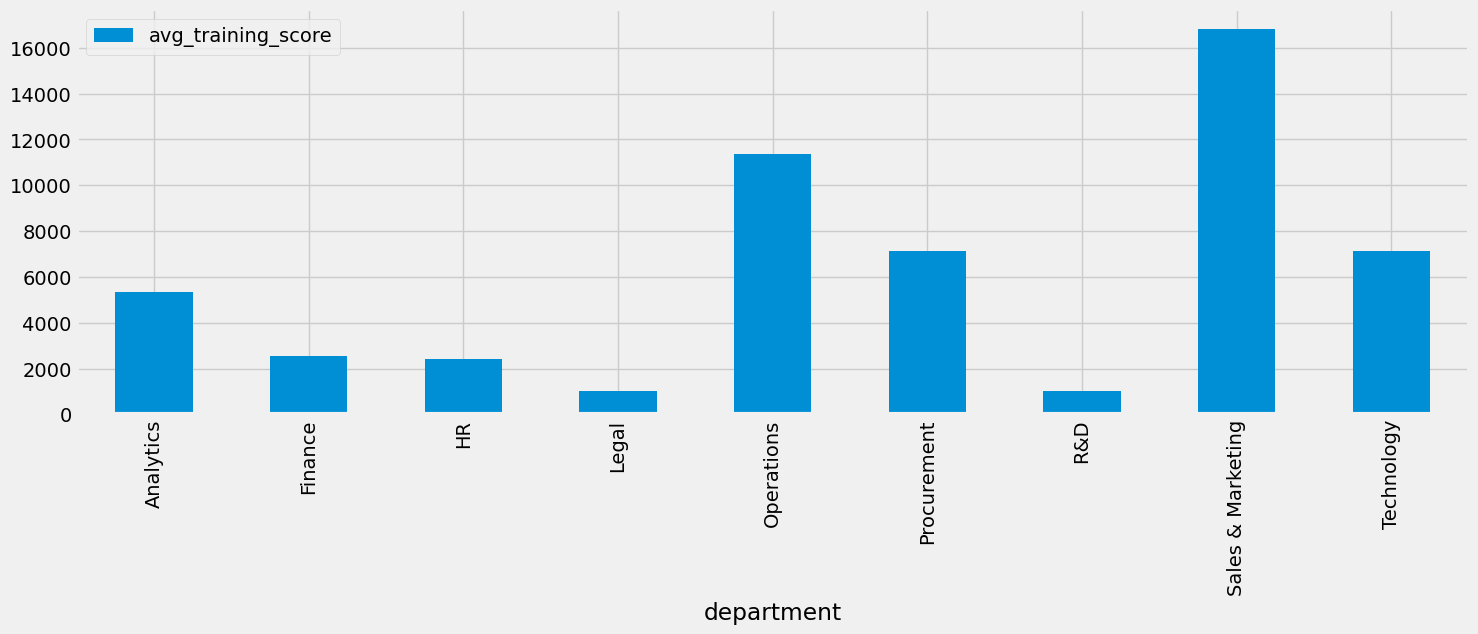

In [40]:
# Department Vs Average Training Score

df[['department','avg_training_score']].groupby('department').count().plot(kind = 'bar')

##  Multivariate Analysis

C:\Users\prabh\AppData\Local\Temp\ipykernel_24536\42848784.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


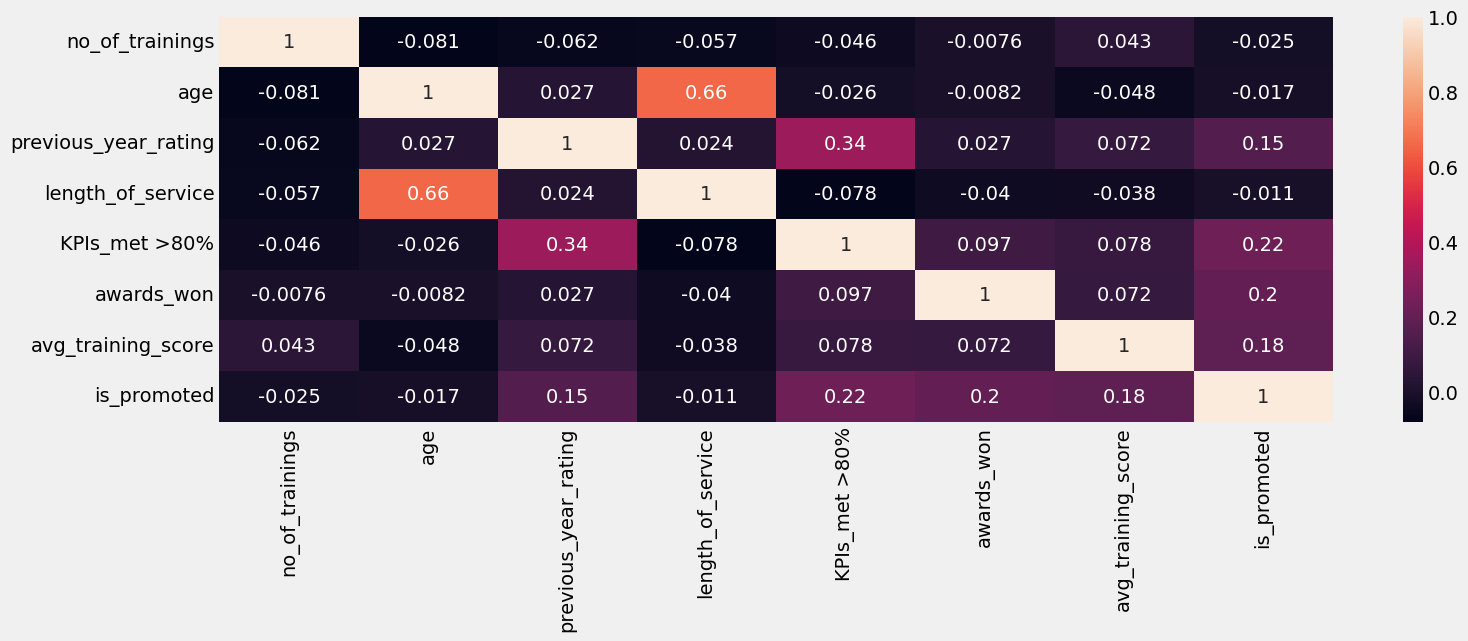

In [41]:
cor = df.corr()
sns.heatmap(cor, annot = True)
plt.show()

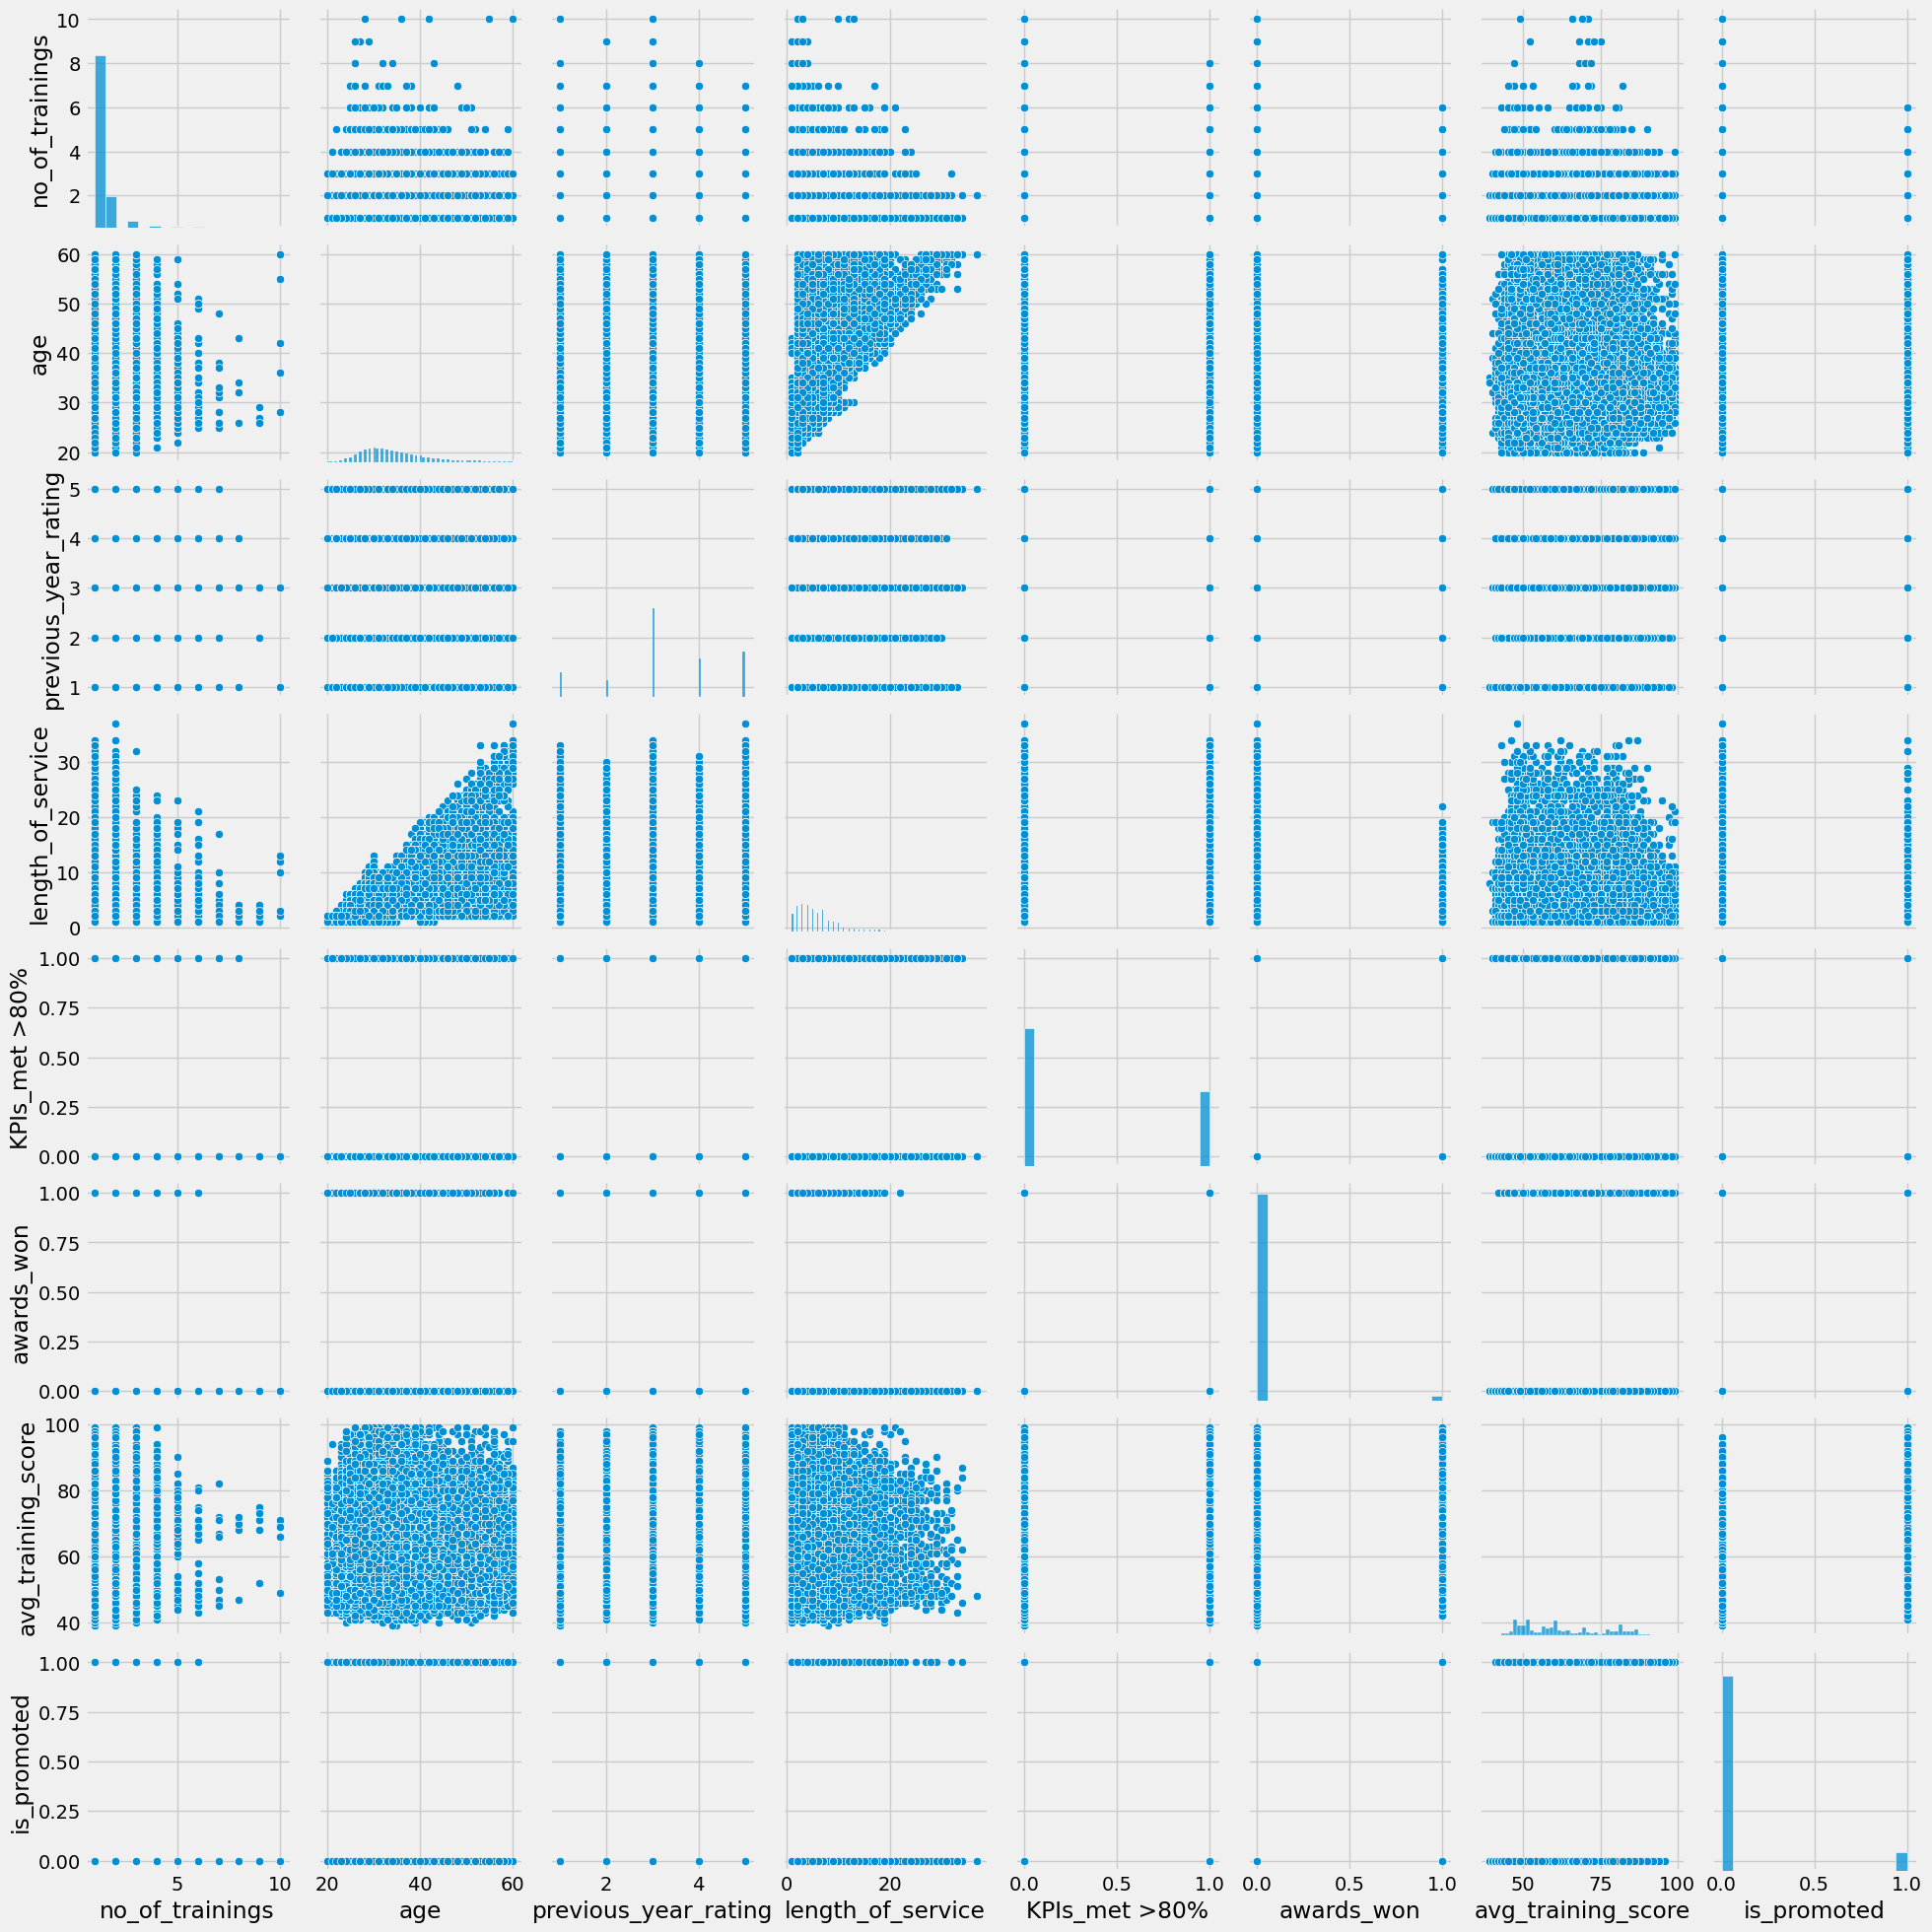

In [42]:
sns.pairplot(df)

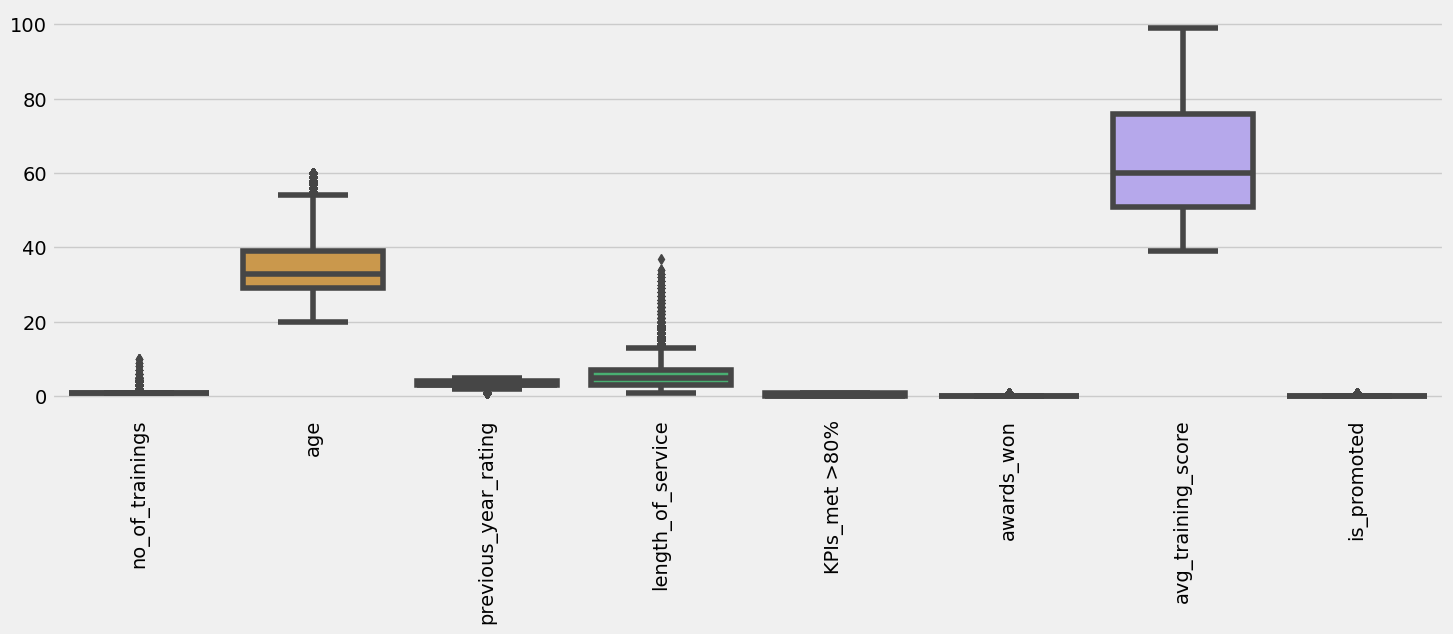

In [43]:
sns.boxplot(df)
plt.xticks(rotation = 90)
plt.show()

## Feature Engineering

In [44]:
df.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,Female,sourcing,1,35,5,8,1,0,49,0
1,Operations,Bachelor's,Male,other,1,30,5,4,0,0,60,0
2,Sales & Marketing,Bachelor's,Male,sourcing,1,34,3,7,0,0,50,0
3,Sales & Marketing,Bachelor's,Male,other,2,39,1,10,0,0,50,0
4,Technology,Bachelor's,Male,other,1,45,3,2,0,0,73,0


In [45]:
x = pd.get_dummies(df[['department','education','gender','recruitment_channel']],drop_first = True)
x

,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_Male,recruitment_channel_referred,recruitment_channel_sourcing
0,0,0,0,0,0,0,1,0,0,1,0,0,1
1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,0,0,0,0,0,0,0,1,0,0,1,0,1
54804,0,0,0,1,0,0,0,0,0,1,0,0,0
54805,0,0,0,0,0,0,0,0,0,0,1,0,0
54806,0,0,0,0,0,0,1,0,0,0,1,0,1


In [46]:
df.drop(['department','education','gender','recruitment_channel'],axis = 1, inplace = True)

In [47]:
df = pd.concat([df,x],axis = 1)
df

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won,avg_training_score,is_promoted,department_Finance,department_HR,...,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_Male,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5,8,1,0,49,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,1,30,5,4,0,0,60,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1,34,3,7,0,0,50,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,2,39,1,10,0,0,50,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,45,3,2,0,0,73,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1,48,3,17,0,0,78,0,0,0,...,0,0,0,0,1,0,0,1,0,1
54804,1,37,2,6,0,0,56,0,0,0,...,1,0,0,0,0,0,1,0,0,0
54805,1,27,5,3,1,0,79,0,0,0,...,0,0,0,0,0,0,0,1,0,0
54806,1,29,1,2,0,0,45,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [48]:
x = df.drop('is_promoted',axis = 1)
y = df['is_promoted']

In [49]:
x

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_Male,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5,8,1,0,49,0,0,0,0,0,0,1,0,0,1,0,0,1
1,1,30,5,4,0,0,60,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,34,3,7,0,0,50,0,0,0,0,0,0,1,0,0,0,1,0,1
3,2,39,1,10,0,0,50,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1,45,3,2,0,0,73,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1,48,3,17,0,0,78,0,0,0,0,0,0,0,1,0,0,1,0,1
54804,1,37,2,6,0,0,56,0,0,0,1,0,0,0,0,0,1,0,0,0
54805,1,27,5,3,1,0,79,0,0,0,0,0,0,0,0,0,0,1,0,0
54806,1,29,1,2,0,0,45,0,0,0,0,0,0,1,0,0,0,1,0,1


In [50]:
y

0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: is_promoted, Length: 54808, dtype: int64

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [52]:
x

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_Male,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5,8,1,0,49,0,0,0,0,0,0,1,0,0,1,0,0,1
1,1,30,5,4,0,0,60,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,34,3,7,0,0,50,0,0,0,0,0,0,1,0,0,0,1,0,1
3,2,39,1,10,0,0,50,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1,45,3,2,0,0,73,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1,48,3,17,0,0,78,0,0,0,0,0,0,0,1,0,0,1,0,1
54804,1,37,2,6,0,0,56,0,0,0,1,0,0,0,0,0,1,0,0,0
54805,1,27,5,3,1,0,79,0,0,0,0,0,0,0,0,0,0,1,0,0
54806,1,29,1,2,0,0,45,0,0,0,0,0,0,1,0,0,0,1,0,1


In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [54]:
x_train.shape

(41106, 20)

In [55]:
x_test.shape

(13702, 20)

In [56]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\prabh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
y_predict = model.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score
from sklearn.metrics import recall_score, precision_score

print(f'Accuracy Score: {accuracy_score(y_test,y_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test,y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_test,y_predict)}')
print(f'Recall score: {recall_score(y_test,y_predict)}')
print(f'Precision score: {precision_score(y_test,y_predict)}')

Accuracy Score: 0.9182601080134287
Confusion Matrix: 
[[12442   106]
 [ 1014   140]]
Area Under Curve: 0.5564347981739721
Recall score: 0.12131715771230503
Precision score: 0.5691056910569106
